# Data Science and Machine Learning for Geospatial Data
### Exploratory Data Analysis of the HURDAT2 Data for Hurricane Prediction using Tableau and Python

# Table of contents
### Introduction
#### Data Extraction
#### EDA with Tableau
#### EDA with Python

# Introduction
Atlantci Hurricane dataset (known as Atlantic HURDAT2) has a comma-delimited, text format with six-hourly information on the location, maximum winds, central pressure, and (beginning in 2004) size of all known tropical cyclones and subtropical cyclones. As a part of our assignment we will first do exploratory data analysis of dataset using Tableau and Python. After that we will do data processing , build machine learning model , test and evaluate the model. We divided our work into notedbooks , this nootbook contain EDA of the dataset and the Hurrican_Prediction_model notebook contains the worklflow of model building, testing and evaluation.

# <b>Importing the Data into the Workspace</b>

In [1]:
# Import the relevant frameworks or libraries that would be used.
import pandas as pd
import geopandas as gpd
import numpy as np
import cartopy
import cartopy.feature as cpf
from matplotlib.pyplot import figure, show
import numpy.random as npr
import matplotlib.pyplot as plt
from shapely.geometry import Point
import seaborn as sns
%matplotlib inline

In [2]:
#read the hurricane data as a DataFrame and see a few sample
data = pd.read_csv("atlantic.csv", parse_dates = ["Date"], error_bad_lines = False)
data.sample(5)

ID                 Name       Date  Time Event Status Latitude  \
39393  AL211995                TANYA 1995-10-30  1200           HU    33.1N   
15853  AL021929              UNNAMED 1929-10-03  1800           EX    44.1N   
9313   AL021900              UNNAMED 1900-09-08     0           TS    15.3N   
20507  AL131944              UNNAMED 1944-10-24   600           EX    64.5N   
30798  AL171972              UNNAMED 1972-10-15   600           TD    32.6N   

      Longitude  Maximum Wind  Minimum Pressure  ...  Low Wind SW  \
39393     53.4W            70               979  ...         -999   
15853     73.4W            50              -999  ...         -999   
9313      33.6W            55              -999  ...         -999   
20507     39.0W            40              -999  ...         -999   
30798     51.8W            25              -999  ...         -999   

       Low Wind NW  Moderate Wind NE  Moderate Wind SE  Moderate Wind SW  \
39393         -999              -999              -999              -999   
15853         -999              -999              -999              -999   
9313          -999              -999              -999              -999   
20507         -999              -999              -999              -999   
30798         -999              -999              -999              -999   

       Moderate Wind NW  High Wind NE  High Wind SE  High Wind SW  \
39393              -999          -999          -999          -999   
15853              -999          -999          -999          -999   
9313               -999          -999          -999          -999   
20507              -999          -999          -999          -999   
30798              -999          -999          -999          -999   

       High Wind NW  
39393          -999  
15853          -999  
9313           -999  
20507          -999  
30798          -999  

[5 rows x 22 columns]

In [3]:
data.head()

ID                 Name       Date  Time Event Status Latitude  \
0  AL011851              UNNAMED 1851-06-25     0           HU    28.0N   
1  AL011851              UNNAMED 1851-06-25   600           HU    28.0N   
2  AL011851              UNNAMED 1851-06-25  1200           HU    28.0N   
3  AL011851              UNNAMED 1851-06-25  1800           HU    28.1N   
4  AL011851              UNNAMED 1851-06-25  2100     L     HU    28.2N   

  Longitude  Maximum Wind  Minimum Pressure  ...  Low Wind SW  Low Wind NW  \
0     94.8W            80              -999  ...         -999         -999   
1     95.4W            80              -999  ...         -999         -999   
2     96.0W            80              -999  ...         -999         -999   
3     96.5W            80              -999  ...         -999         -999   
4     96.8W            80              -999  ...         -999         -999   

   Moderate Wind NE  Moderate Wind SE  Moderate Wind SW  Moderate Wind NW  \
0              -999              -999              -999              -999   
1              -999              -999              -999              -999   
2              -999              -999              -999              -999   
3              -999              -999              -999              -999   
4              -999              -999              -999              -999   

   High Wind NE  High Wind SE  High Wind SW  High Wind NW  
0          -999          -999          -999          -999  
1          -999          -999          -999          -999  
2          -999          -999          -999          -999  
3          -999          -999          -999          -999  
4          -999          -999          -999          -999  

[5 rows x 22 columns]

In [4]:
data.tail()

ID                 Name       Date  Time Event Status Latitude  \
49100  AL122015                 KATE 2015-11-12  1200           EX    41.3N   
49101  AL122015                 KATE 2015-11-12  1800           EX    41.9N   
49102  AL122015                 KATE 2015-11-13     0           EX    41.5N   
49103  AL122015                 KATE 2015-11-13   600           EX    40.8N   
49104  AL122015                 KATE 2015-11-13  1200           EX    40.7N   

      Longitude  Maximum Wind  Minimum Pressure  ...  Low Wind SW  \
49100     50.4W            55               981  ...          180   
49101     49.9W            55               983  ...          180   
49102     49.2W            50               985  ...          200   
49103     47.5W            45               985  ...          180   
49104     45.4W            45               987  ...          150   

       Low Wind NW  Moderate Wind NE  Moderate Wind SE  Moderate Wind SW  \
49100          120               120               120                60   
49101          120               120               120                60   
49102          220               120               120                60   
49103          220                 0                 0                 0   
49104          220                 0                 0                 0   

       Moderate Wind NW  High Wind NE  High Wind SE  High Wind SW  \
49100                 0             0             0             0   
49101                 0             0             0             0   
49102                 0             0             0             0   
49103                 0             0             0             0   
49104                 0             0             0             0   

       High Wind NW  
49100             0  
49101             0  
49102             0  
49103             0  
49104             0  

[5 rows x 22 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49105 entries, 0 to 49104
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                49105 non-null  object        
 1   Name              49105 non-null  object        
 2   Date              49105 non-null  datetime64[ns]
 3   Time              49105 non-null  int64         
 4   Event             49105 non-null  object        
 5   Status            49105 non-null  object        
 6   Latitude          49105 non-null  object        
 7   Longitude         49105 non-null  object        
 8   Maximum Wind      49105 non-null  int64         
 9   Minimum Pressure  49105 non-null  int64         
 10  Low Wind NE       49105 non-null  int64         
 11  Low Wind SE       49105 non-null  int64         
 12  Low Wind SW       49105 non-null  int64         
 13  Low Wind NW       49105 non-null  int64         
 14  Moderate Wind NE  4910

In [6]:
data.shape

(49105, 22)

The initial Exploration of the Datasets shows us that the data is made up of 49105 records and 22 columns corresponding to different value fields from ID of the Tropical Storm to the Directional Wind Speed. We will proceed to get this data in the right form and shape suitable for developing our models.

# Data Cleaning
#### In this steps, we will apply series of data preparation techniques to our data to get it to the right form and shape suitable for developing a robust machine learning model.

The first transformation we will make is with the Location Attributes: Lattitude and Longitudes. In the unprocessed data, these values were recorded with a Northing and Easting attributes to showcase which part of the hemisphere and the meridian they fall on. Although useful, we will need to convert our field into numerical values that corresponds to the absolute coordinate of the points. 

In [7]:
import re
# N and E at the end of the latitude and longitude correspond to positive value while S and W 
#correspond to negative values
def absolute_coord(coord):
        hem = re.findall(r'[NSWE]' , coord)[0]
        if hem == 'N' or hem == 'E':
            return float(coord[:-1])
        else:
            return -1*float(coord[:-1])

# Replacing the columns with the new values  
data['Latitude'] = data['Latitude'].apply(absolute_coord)
data['Longitude'] = data['Longitude'].apply(absolute_coord)

<h4> Removing Null Values or Missing Data </h4>
<p> Another step is to remove the missing data. As with most meteorological records, the missing data are usually recorded as -999, connoting that either no observation was taken or the values are missing. We will need to discard the inputs or replace them with a constant value. In this case, we will first explore the data to see the degree of missing values that exist in the data.</p>

In [8]:
#replace -999 with NAN and compute the percentage of NANs per column
data.replace([-999, 'UNNAMED'], np.nan, inplace=True)
data.isna().sum()/len(data)*100

ID                   0.000000
Name                 0.000000
Date                 0.000000
Time                 0.000000
Event                0.000000
Status               0.000000
Latitude             0.000000
Longitude            0.000000
Maximum Wind         0.000000
Minimum Pressure    62.455962
Low Wind NE         87.942165
Low Wind SE         87.942165
Low Wind SW         87.942165
Low Wind NW         87.942165
Moderate Wind NE    87.942165
Moderate Wind SE    87.942165
Moderate Wind SW    87.942165
Moderate Wind NW    87.942165
High Wind NE        87.942165
High Wind SE        87.942165
High Wind SW        87.942165
High Wind NW        87.942165
dtype: float64

Based on the computation made above, we can see that the missing values in many of the columns connoting Meteorological Variables reaches as much as 87.94%, which is way too much. Working with this kind of data can significantly introduce biases to our model and lead to many false positives or wrong predictions. Hence, we will drop the other columns and stick with the columns that have no missing values.

In [9]:
#Let's take a look at the data again.
data

ID                 Name       Date    Time Event Status  \
0      AL011851              UNNAMED 1851-06-25     0.0           HU   
1      AL011851              UNNAMED 1851-06-25   600.0           HU   
2      AL011851              UNNAMED 1851-06-25  1200.0           HU   
3      AL011851              UNNAMED 1851-06-25  1800.0           HU   
4      AL011851              UNNAMED 1851-06-25  2100.0     L     HU   
...         ...                  ...        ...     ...   ...    ...   
49100  AL122015                 KATE 2015-11-12  1200.0           EX   
49101  AL122015                 KATE 2015-11-12  1800.0           EX   
49102  AL122015                 KATE 2015-11-13     0.0           EX   
49103  AL122015                 KATE 2015-11-13   600.0           EX   
49104  AL122015                 KATE 2015-11-13  1200.0           EX   

       Latitude  Longitude  Maximum Wind  Minimum Pressure  ...  Low Wind SW  \
0          28.0      -94.8          80.0               NaN  ...          NaN   
1          28.0      -95.4          80.0               NaN  ...          NaN   
2          28.0      -96.0          80.0               NaN  ...          NaN   
3          28.1      -96.5          80.0               NaN  ...          NaN   
4          28.2      -96.8          80.0               NaN  ...          NaN   
...         ...        ...           ...               ...  ...          ...   
49100      41.3      -50.4          55.0             981.0  ...        180.0   
49101      41.9      -49.9          55.0             983.0  ...        180.0   
49102      41.5      -49.2          50.0             985.0  ...        200.0   
49103      40.8      -47.5          45.0             985.0  ...        180.0   
49104      40.7      -45.4          45.0             987.0  ...        150.0   

       Low Wind NW  Moderate Wind NE  Moderate Wind SE  Moderate Wind SW  \
0              NaN               NaN               NaN               NaN   
1              NaN               NaN               NaN               NaN   
2              NaN               NaN               NaN               NaN   
3              NaN               NaN               NaN               NaN   
4              NaN               NaN               NaN               NaN   
...            ...               ...               ...               ...   
49100        120.0             120.0             120.0              60.0   
49101        120.0             120.0             120.0              60.0   
49102        220.0             120.0             120.0              60.0   
49103        220.0               0.0               0.0               0.0   
49104        220.0               0.0               0.0               0.0   

       Moderate Wind NW  High Wind NE  High Wind SE  High Wind SW  \
0                   NaN           NaN           NaN           NaN   
1                   NaN           NaN           NaN           NaN   
2                   NaN           NaN           NaN           NaN   
3                   NaN           NaN           NaN           NaN   
4                   NaN           NaN           NaN           NaN   
...                 ...           ...           ...           ...   
49100               0.0           0.0           0.0           0.0   
49101               0.0           0.0           0.0           0.0   
49102               0.0           0.0           0.0           0.0   
49103               0.0           0.0           0.0           0.0   
49104               0.0           0.0           0.0           0.0   

       High Wind NW  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
...             ...  
49100           0.0  
49101           0.0  
49102           0.0  
49103           0.0  
49104           0.0  

[49105 rows x 22 columns]

In [10]:
#We can drop the rows with null values and have only the rows with filled values. This will significantly reduce 
#the amount of data available for us to work with and train our model. It doesn't seem like the best logical 
#approach. A more logical approach could be to replace the value with an average value. But seems we are 
#essentially interested in reducing biases in our data to the bare minimum, we will stick to just removing the 
#columns with excessive missing values.

#data.dropna(inplace = True)
##data.sample(5)

In [11]:
#Dropping the other columns with too many missing values. Plus, the Event columns, doesn't seem to have much use. 
drop_columns = ['Event', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE',
       'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE',
       'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE',
       'High Wind SW', 'High Wind NW']

data.drop(drop_columns, axis='columns', inplace=True)

In [12]:
#We also strip the column of white spaces and add new columns for year and Month
data['Status'] = data.Status.str.strip()
data['Name'] = data.Name.str.strip()
data['Year'] = data.Date.dt.year
data['Month'] = data.Date.dt.month
data.sample(5)

ID     Name       Date    Time Status  Latitude  Longitude  \
23478  AL121953    HAZEL 1953-10-09     0.0     TS      24.1      -85.2   
48088  AL182012    SANDY 2012-10-29   600.0     HU      35.3      -70.5   
25032  AL051958     ELLA 1958-09-05     0.0     TS      24.7      -90.1   
1839   AL031870  UNNAMED 1870-09-03   600.0     TS      18.0      -43.7   
13026  AL031916  UNNAMED 1916-07-18  1200.0     HU      29.1      -72.8   

       Maximum Wind  Year  Month  
23478          55.0  1953     10  
48088          80.0  2012     10  
25032          55.0  1958      9  
1839           50.0  1870      9  
13026          85.0  1916      7

<h3>###########################################################################################</h3>

<h2>Geographic Coordinates</h2>
In order to make it easy to plot the locations of points of tropical storms on a map, the Pandas DataFrame will be converted to a GeoDataFrame using the GeoPandas Package and the Geometric Points will be derived from the Lattitude and Longitude.

In [13]:
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude), crs="EPSG:4326")
gdf.sample(5)

ID     Name       Date    Time Status  Latitude  Longitude  \
18290  AL081936  UNNAMED 1936-08-18   600.0     HU      23.7      -95.5   
722    AL021859  UNNAMED 1859-08-19   600.0     HU      42.0      -57.3   
36496  AL091988   HELENE 1988-09-25  1800.0     HU      20.9      -49.3   
6071   AL021889  UNNAMED 1889-06-15     0.0     TS      19.8      -83.7   
22520  AL041951  CHARLIE 1951-08-14   600.0     TS      13.2      -51.6   

       Maximum Wind  Year  Month                    geometry  
18290          65.0  1936      8  POINT (-95.50000 23.70000)  
722            90.0  1859      8  POINT (-57.30000 42.00000)  
36496          90.0  1988      9  POINT (-49.30000 20.90000)  
6071           35.0  1889      6  POINT (-83.70000 19.80000)  
22520          40.0  1951      8  POINT (-51.60000 13.20000)

In [14]:
gdf.to_csv('hurricanes.csv')

# Exploratory Data Analysis
In this phase, we will explore the data by creating a number of plots and charts to show the distribution of values and to understand the data in more depth. 

In [15]:
#setting the parameters for our plots
font = {'family' : 'fo',
        'weight' : 'bold',
        'size'   : 12}
plt.rc('font', **font)
sns.set_style('dark')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_theme()

In [16]:
#derive the unique values based on the Storm IDs, the initial timestamp and the most recent timestamp
gdf.ID.nunique(), gdf.Date.min(), gdf.Date.max()

(1814, Timestamp('1851-06-25 00:00:00'), Timestamp('2015-11-13 00:00:00'))

In [17]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

#### Geographical Distribution of Hurricanes

Text(0.5, 248.90042981636066, 'Longitude')

findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.


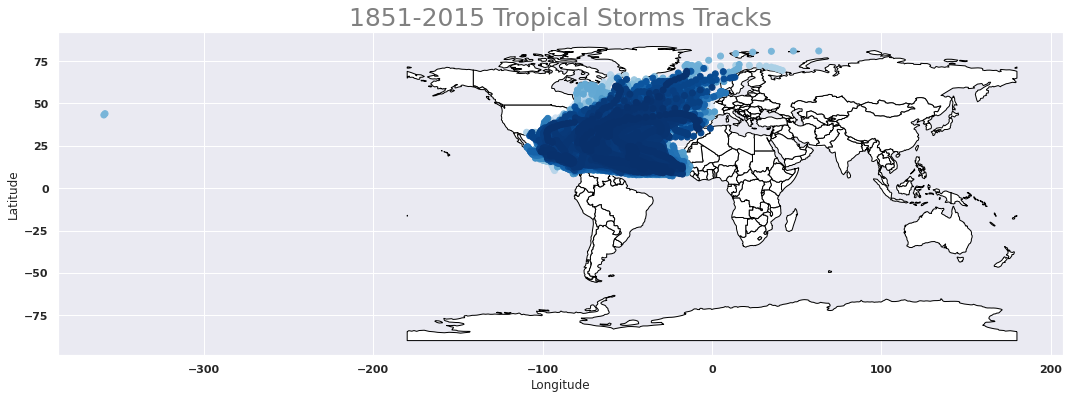

In [18]:
#%matplotlib widget
#import contextily as ctx
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(18, 12))
ax = world.plot(color='white', edgecolor='black', ax=ax)
gdf.plot(ax=ax, cmap='Blues')
#ctx.add_basemap(ax, url=ctx.providers.CartoDB.Positron) 
plt.title('1851-2015 Tropical Storms Tracks' , fontsize = 25, fontname='Palatino Linotype', color='grey')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

#### Top 5 Hurricanes by Frequency

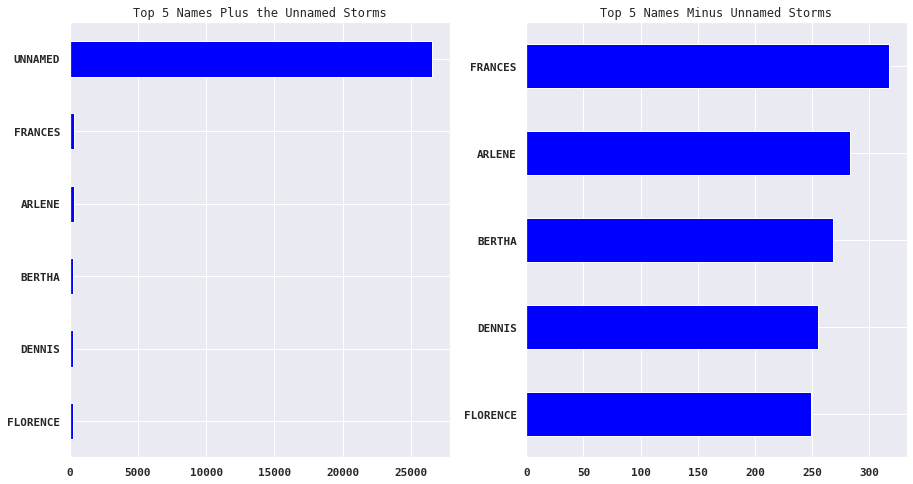

In [25]:
top5 = data.Name.value_counts()[:6].index
top6 = data.Name.value_counts()[1:6].index

fig, ax = plt.subplots(1,2)
fig.set_size_inches(15,8)

data[data.Name.isin(top5)].Name.value_counts(ascending=True).plot(kind='barh', color='Blue', ax=ax[0])
ax[0].set_title('Top 5 Names Plus the Unnamed Storms')

data[data.Name.isin(top6)].Name.value_counts(ascending=True).plot(kind='barh', color='Blue', ax=ax[1])
ax[1].set_title('Top 5 Names Minus Unnamed Storms');

Apparently, the unnamed storms are the most common storms in the datasets accounting for the tropical storms that had occured before the Storm/Hurricane Naming System was introduced. 

##### Probability Distribution Function of Frequency

C:\Users\Hira Zafar\anaconda3\envs\my_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Probability Distribution of Frequency of Cyclones.', ylabel='Density'>

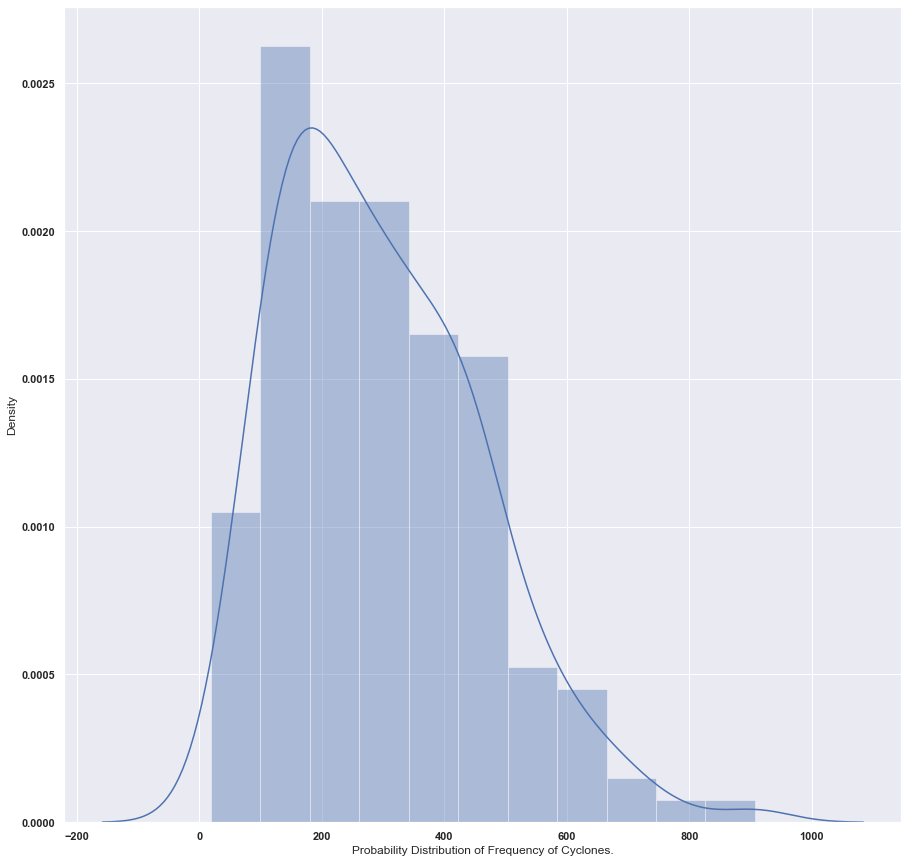

In [18]:
temp = data.groupby('Year').count().sort_values(by = 'Date' , ascending = False)
plt.figure(figsize=(15,15))
sns.distplot(temp['Date'].values , norm_hist = True , axlabel = 'Probability Distribution of Frequency of Cyclones.')

#### Category Wise Frequency Distribution of Cyclones

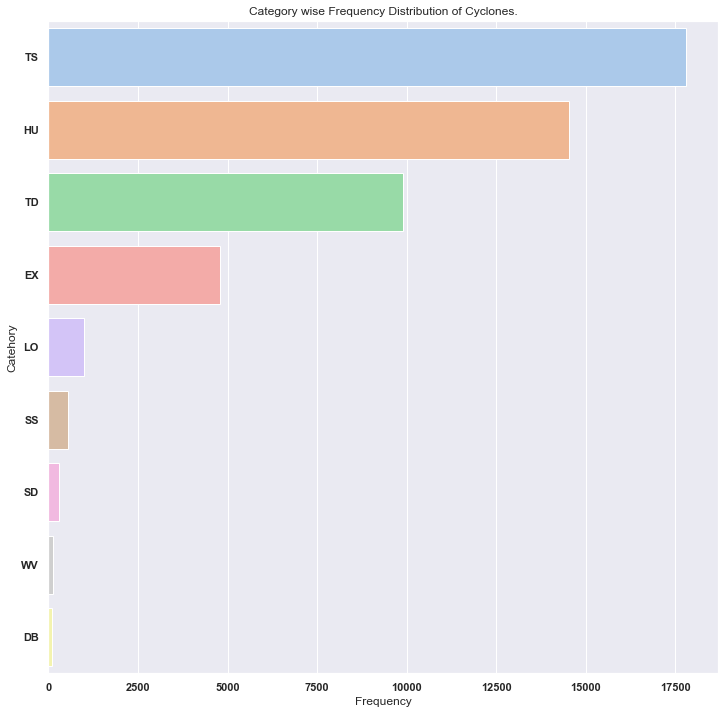

In [19]:
temp = data.groupby('Status').count().sort_values(by = 'Date' , ascending = False)
fig , ax = plt.subplots()
fig.set_size_inches(12,12)
sns.barplot(y = list(temp.index) , x = 'Date' , data = temp, palette= 'pastel' )
plt.xlabel('Frequency')
plt.ylabel('Catehory')
plt.title('Category wise Frequency Distribution of Cyclones.')
plt.show()

## Landfall Stroms
Typhoons that made Landfalls

In [19]:
#create an empty column that we will populate with boolean values 
#to indicate if the typhoon made landfall at the time of measurement
gdf['Land Fall'] = np.nan 

In [20]:
#if the point is within a landmass, add True to Land Fall column, if not, skip.
for i in gdf.index:
    for j in world.geometry.iteritems():
        if gdf.loc[i, 'geometry'].intersects(j[1]):
            gdf.loc[i,'Land Fall'] =  True
            break

In [21]:
gdf['Land Fall'].value_counts()

True    5792
Name: Land Fall, dtype: int64

In [22]:
landfall = gdf[gdf['Land Fall']==True]
landfall.Name.nunique()

218

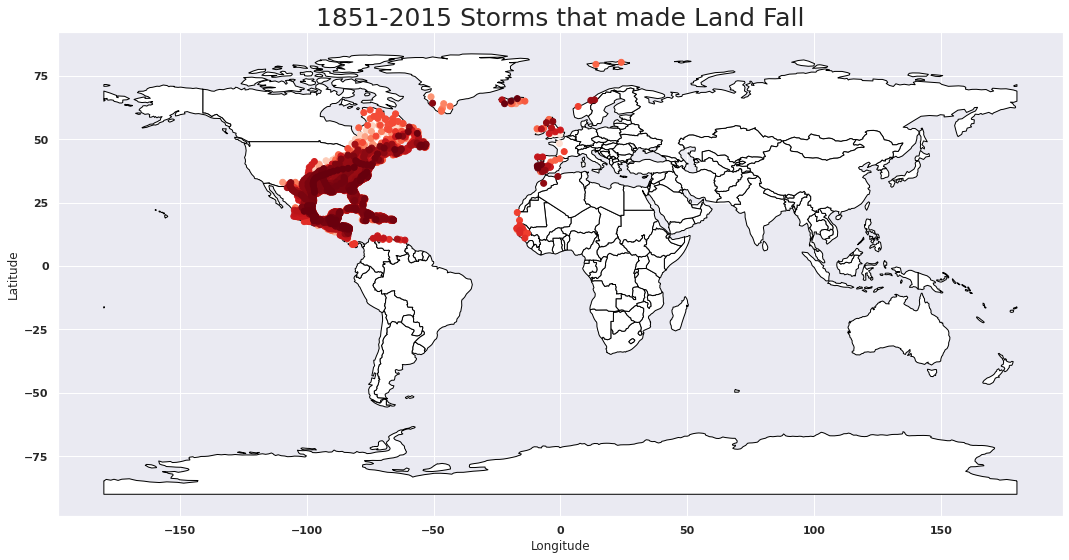

In [23]:
fig, ax = plt.subplots(nrows=1, figsize=(18, 10))
ax = world.plot(color='white', edgecolor='black', ax=ax)
gdf[gdf['Land Fall']==True].plot(ax=ax, cmap='Reds')
plt.title('1851-2015 Storms that made Land Fall' , fontsize = 25)
plt.ylabel('Latitude')
plt.xlabel('Longitude');

-----------------------

There are 4 status that stands out that accounts for ~98% of all measurements. Tropical Storm (TS) is the most frequent status with wind speed of 34-63 knots, followed by Tropical Depression (TD) with wind speed of up to 34 knots, Hurricane (HU) with wind speed of at least 64 knots and a Low (LO) that is neither a tropical cyclone, a subtropical cyclone, nor an extratropical cyclone (of any intensity).

## Cyclicality: 
On average there are nearly 10 storms occurring each season, with 2005 being the most active season with 28 storms. The data shows there is a detectable increase in the frequency and severity of hurricanes in the past few decades. Is climate change the reason for observing increased severity, and clustering effects of hurricanes as we witnessed in 2017? Plotting a 10 and 25 year moving average shows a multi-decadal oscillation.

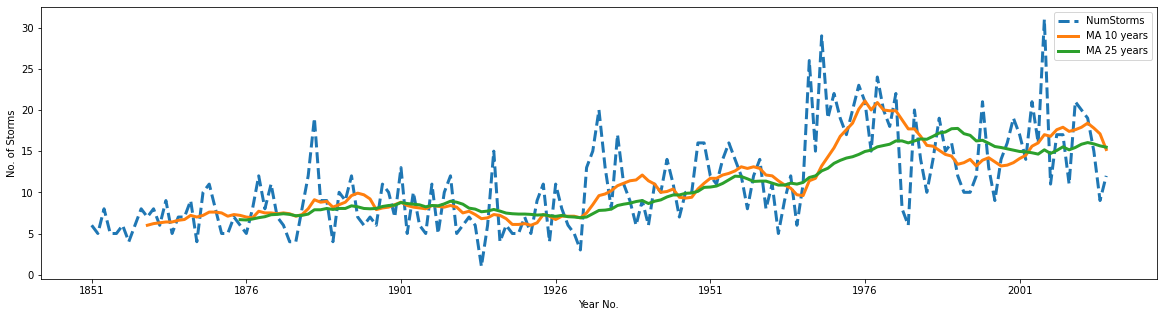

In [29]:
def HurrCyclicality(hurdat2):
  grouped_by_year = hurdat2.groupby('Year')['ID'].unique().to_frame().reset_index()
  grouped_by_year['NumStorms'] = grouped_by_year['ID'].str.len()
  grouped_by_year['Year'] = grouped_by_year['Year'].astype('int')
  grouped_by_year['NumStorms'] = grouped_by_year['NumStorms'].astype('int')
  plt.rcParams["figure.figsize"] =(20,5)
  grouped_by_year.plot(x='Year', y='NumStorms',linewidth=3,linestyle = 'dashed')
  plt.xticks(np.arange(grouped_by_year.Year.min(),grouped_by_year.Year.max(),25))
  plt.ylabel('No. of Storms')
  plt.plot(grouped_by_year['Year'],grouped_by_year['NumStorms'].rolling(10).mean(),label= 'MA 10 years', linewidth=3)
  plt.plot(grouped_by_year['Year'],grouped_by_year['NumStorms'].rolling(25).mean(),label= 'MA 25 years', linewidth=3)
  plt.ylabel('No. of Storms')
  plt.xlabel('Year No.')
  plt.legend()
HurrCyclicality(data)

## Best Strom Track
Plot tracks of Hurricanes

In [3]:
import pandas as pd
from datetime import datetime, date, time
Record_identifier_dic={'C':"Closest approach to a coast, not followed by a landfall"
,'G':"Genesis"
,'I':"An intensity peak in terms of both pressure and wind"
,'L':"Landfall (center of system crossing a coastline)"
,'P':"Minimum in central pressure"
,'R':"Provides additional detail on the intensity of the cyclone when rapid changes are underway"
,'S':"Change of status of the system"
,'T':"Provides additional detail on the track (position) of the cyclone"
,'W':"Maximum sustained wind speed"}
Status_of_system_dic={
'TD':"Tropical cyclone of tropical depression intensity (< 34 knots)"
,'TS':"Tropical cyclone of tropical storm intensity (34-63 knots)"
,'HU':"Tropical cyclone of hurricane intensity (> 64 knots)"
,'EX':"Extratropical cyclone (of any intensity)"
,'SD':"Subtropical cyclone of subtropical depression intensity (< 34 knots)"
,'SS':"Subtropical cyclone of subtropical storm intensity (> 34 knots)"
,'LO':"A low that is neither a tropical cyclone, a subtropical cyclone, nor an extratropical cyclone (of any intensity)"
,'WV':"Tropical Wave (of any intensity)"
,'DB':"Disturbance (of any intensity)"} 
    
def process_details(data):
    data=data.split(',')

    Year=int(data[0][0:4])
    Month=int(data[0][4:6])
    Day=int(data[0][6:8])
    Hours_in_UTC=int(data[1].strip()[0:2])
    Minutes_in_UTC=int(data[1].strip()[2:4])
    date_time=datetime.combine(date(Year,Month,Day),time(Hours_in_UTC, Minutes_in_UTC))
    Record_identifier=data[2].strip()
    try:
        Record_identifier_desc=Record_identifier_dic[data[2].strip()]
    except:
        Record_identifier_desc=None
        
    Status_of_system=data[3].strip()
    try:
        Status_of_system_desc=Status_of_system_dic[Status_of_system]
    except:
        Status_of_system_desc=None
        
    if data[4].strip()[-1:] in ('N','S'):
        if data[4].strip()[-1:]=='N':
            Latitude=float(data[4].strip()[:-1])
        else:
            Latitude=-1.0*float(data[4].strip()[:-1])
    else:
        Latitude=-999
    
    if data[5].strip()[-1:] in ('E','W'):
        if data[5].strip()[-1:]=='E':
            Longitude=float(data[5].strip()[:-1])
        else:
            Longitude=-1.0*float(data[5].strip()[:-1])
    else:
        Longitude=-999
    Maximum_sustained_wind_in_knots=float(data[6].strip())
    Minimum_Pressure_in_millibars=float(data[7].strip())
    
    res=date_time,Year,Month,Day,Hours_in_UTC,Minutes_in_UTC,Record_identifier,Record_identifier_desc,
    Status_of_system,Status_of_system_desc,Latitude,Longitude,Maximum_sustained_wind_in_knots,Minimum_Pressure_in_millibars
    return res

def process_header(data):
    data=data.split(',')
    Basin,ATCF_cyclone_number_for_that_year,Year,Name,Number_of_best_track_entries=data[0][0:2],data[0][2:4],data[0][4:8],data[1].strip(),data[2].strip()
    res=Basin,ATCF_cyclone_number_for_that_year,Year,Name,Number_of_best_track_entries
    return res


def identify_line_type(data):
    print(data.split(','))
    if len(data.split(','))>4:
        return 2
    else:
        return 1
def columns_name():
    res=['Basin','ATCF_cyclone_number_for_that_year','Year_','Name',
         #'Number_of_best_track_entries',
         'date_time','Year','Month','Day','Hours_in_UTC','Minutes_in_UTC',
         'Record_identifier','Record_identifier_desc','Status_of_system','Status_of_system_desc','Latitude','Longitude'
         ,'Maximum_sustained_wind_in_knots','Minimum_Pressure_in_millibars',]
    return res
pf=[]
header_fields=[]
filepath = "data/hurdat2-1851-2018-051019.txt"
with open(filepath) as fp:
    ln = fp.readline()
    while ln:
        
        lt=identify_line_type(ln)

        details=[]
        if (lt==1):
            header_fields=process_header(ln)
            details=[]
        else:
            details=process_details(ln)
        if (details!=[]):
            n=list(header_fields[:-1])+list(details)

            pf.append(n)
        ln=fp.readline()
        
df=pd.DataFrame(pf)
df.columns=columns_name()
df.to_csv("data/hur.csv")

['AL011851', '            UNNAMED', '     14', '\n']
['18510625', ' 0000', '  ', ' HU', ' 28.0N', '  94.8W', '  80', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18510625', ' 0600', '  ', ' HU', ' 28.0N', '  95.4W', '  80', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18510625', ' 1200', '  ', ' HU', ' 28.0N', '  96.0W', '  80', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18510625', ' 1800', '  ', ' HU', ' 28.1N', '  96.5W', '  80', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18510625', ' 2100', ' L', ' HU', ' 28.2N', '  96.8W', '  80', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18510626',

['18610829', ' 1200', '  ', ' HU', ' 43.5N', '  41.8W', '  90', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18610829', ' 1800', '  ', ' HU', ' 44.3N', '  39.9W', '  90', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18610830', ' 0000', '  ', ' HU', ' 45.4N', '  38.0W', '  90', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18610830', ' 0600', '  ', ' HU', ' 46.5N', '  36.3W', '  90', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18610830', ' 1200', '  ', ' HU', ' 47.7N', '  34.8W', '  90', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18610830', ' 1800', '  ', ' HU', ' 49.0N', '  32.7W', '  90', '

['18720930', ' 0000', '  ', ' TS', ' 13.0N', '  31.7W', '  40', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18720930', ' 0600', '  ', ' TS', ' 13.4N', '  32.7W', '  40', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18720930', ' 1200', '  ', ' TS', ' 13.8N', '  33.7W', '  40', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18720930', ' 1800', '  ', ' TS', ' 14.4N', '  34.7W', '  40', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18721001', ' 0000', '  ', ' TS', ' 15.3N', '  36.0W', '  50', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18721001', ' 0600', '  ', ' TS', ' 16.2N', '  37.4W', '  50', '

['18771017', ' 0000', '  ', ' EX', ' 43.8N', '  48.9W', '  50', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18771017', ' 0600', '  ', ' EX', ' 44.5N', '  47.2W', '  50', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18771017', ' 1200', '  ', ' EX', ' 45.3N', '  45.4W', '  50', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18771017', ' 1800', '  ', ' EX', ' 46.0N', '  42.8W', '  50', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18771018', ' 0000', '  ', ' EX', ' 46.8N', '  40.4W', '  50', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18771018', ' 0600', '  ', ' EX', ' 47.4N', '  37.9W', '  50', '

['18820922', ' 1200', '  ', ' TS', ' 33.0N', '  77.5W', '  50', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18820922', ' 1800', '  ', ' TS', ' 34.0N', '  77.3W', '  50', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18820922', ' 2200', ' L', ' TS', ' 34.7N', '  77.0W', '  50', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18820923', ' 0000', '  ', ' TS', ' 35.0N', '  77.0W', '  40', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18820923', ' 0600', '  ', ' TS', ' 36.0N', '  76.6W', '  40', ' 1005', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18820923', ' 1200', '  ', ' TS', ' 37.0N', '  76.1W', '  40', '

['18870814', ' 1800', '  ', ' TS', ' 18.0N', '  60.0W', '  35', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18870815', ' 0000', '  ', ' TS', ' 19.0N', '  61.0W', '  35', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18870815', ' 0600', '  ', ' TS', ' 20.0N', '  62.2W', '  35', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18870815', ' 1200', '  ', ' TS', ' 21.0N', '  63.4W', '  35', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18870815', ' 1800', '  ', ' TS', ' 21.8N', '  64.6W', '  40', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18870816', ' 0000', '  ', ' TS', ' 22.4N', '  65.8W', '  40', '

['18911012', ' 1200', '  ', ' EX', ' 35.0N', '  73.5W', '  55', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18911012', ' 1800', '  ', ' EX', ' 35.4N', '  73.3W', '  55', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18911013', ' 0000', '  ', ' EX', ' 36.0N', '  73.1W', '  55', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18911013', ' 0600', '  ', ' EX', ' 37.0N', '  72.9W', '  55', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18911013', ' 1200', '  ', ' EX', ' 38.0N', '  72.5W', '  55', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18911013', ' 1800', '  ', ' EX', ' 39.0N', '  71.5W', '  55', '

['18941025', ' 1800', '  ', ' HU', ' 28.0N', '  72.6W', '  85', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18941026', ' 0000', '  ', ' HU', ' 29.0N', '  71.0W', '  85', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18941026', ' 0600', '  ', ' HU', ' 30.0N', '  69.5W', '  85', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18941026', ' 1200', '  ', ' HU', ' 31.0N', '  68.0W', '  85', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18941026', ' 1800', '  ', ' HU', ' 32.9N', '  65.4W', '  85', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18941027', ' 0000', '  ', ' HU', ' 34.9N', '  62.4W', '  85', '

['18990626', ' 1800', '  ', ' TS', ' 27.8N', '  93.6W', '  35', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18990627', ' 0000', '  ', ' TS', ' 28.2N', '  94.2W', '  35', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18990627', ' 0600', '  ', ' TS', ' 28.8N', '  94.8W', '  35', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18990627', ' 0900', ' L', ' TS', ' 29.1N', '  95.1W', '  35', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18990627', ' 1200', '  ', ' TD', ' 29.5N', '  95.5W', '  30', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18990627', ' 1800', '  ', ' TD', ' 30.3N', '  96.2W', '  25', '

['19020920', ' 1800', '  ', ' HU', ' 22.9N', '  52.6W', '  80', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19020921', ' 0000', '  ', ' HU', ' 24.7N', '  51.7W', '  85', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19020921', ' 0600', '  ', ' HU', ' 26.5N', '  50.5W', '  85', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19020921', ' 1200', '  ', ' HU', ' 28.3N', '  49.5W', '  85', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19020921', ' 1800', '  ', ' HU', ' 30.2N', '  48.4W', '  85', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19020922', ' 0000', '  ', ' HU', ' 32.1N', '  47.3W', '  80', '

['19060921', ' 0000', '  ', ' TS', ' 13.2N', '  79.7W', '  35', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19060921', ' 0600', '  ', ' TS', ' 13.6N', '  80.1W', '  35', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19060921', ' 1200', '  ', ' TS', ' 14.0N', '  80.5W', '  35', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19060921', ' 1800', '  ', ' TS', ' 14.6N', '  80.9W', '  35', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19060922', ' 0000', '  ', ' TS', ' 15.2N', '  81.3W', '  40', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19060922', ' 0600', '  ', ' TS', ' 15.8N', '  81.8W', '  40', '

['19090916', ' 0000', '  ', ' TS', ' 19.6N', '  81.0W', '  55', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19090916', ' 0600', '  ', ' TS', ' 19.9N', '  81.5W', '  60', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19090916', ' 1200', '  ', ' HU', ' 20.3N', '  82.0W', '  65', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19090916', ' 1800', '  ', ' HU', ' 20.6N', '  82.4W', '  70', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19090917', ' 0000', '  ', ' HU', ' 20.9N', '  82.9W', '  70', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19090917', ' 0600', '  ', ' HU', ' 21.3N', '  83.3W', '  75', '

['19160917', ' 0000', '  ', ' TS', ' 27.2N', '  62.0W', '  45', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19160917', ' 0600', '  ', ' TS', ' 28.5N', '  61.5W', '  50', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19160917', ' 1200', '  ', ' TS', ' 29.7N', '  61.0W', '  55', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19160917', ' 1800', '  ', ' TS', ' 30.7N', '  60.1W', '  60', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19160918', ' 0000', '  ', ' HU', ' 31.7N', '  58.9W', '  65', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19160918', ' 0600', '  ', ' HU', ' 32.7N', '  57.4W', '  70', '

['19221012', ' 1800', '  ', ' TD', ' 12.2N', '  77.2W', '  25', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19221013', ' 0000', '  ', ' TD', ' 12.5N', '  77.4W', '  25', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19221013', ' 0600', '  ', ' TD', ' 12.9N', '  77.6W', '  25', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19221013', ' 1200', '  ', ' TD', ' 13.5N', '  78.0W', '  25', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19221013', ' 1800', '  ', ' TD', ' 14.3N', '  78.5W', '  25', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19221014', ' 0000', '  ', ' TD', ' 15.2N', '  79.0W', '  30', '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['19440804', ' 0600', '  ', ' TD', ' 41.3N', '  67.9W', '  30', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['AL041944', '            UNNAMED', '     32', '\n']
['19440816', ' 1800', '  ', ' TS', ' 12.1N', '  59.5W', '  50', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19440817', ' 0000', '  ', ' TS', ' 12.1N', '  60.5W', '  60', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19440817', ' 0600', '  ', ' HU', ' 12.3N', '  61.5W', '  65', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19440817', ' 1200', '  ', ' HU', ' 12.7N', '  62.5W', '  70', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19440817',

['19480913', ' 0600', '  ', ' HU', ' 29.8N', '  65.2W', ' 115', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19480913', ' 1200', '  ', ' HU', ' 31.0N', '  65.8W', ' 115', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19480913', ' 1800', '  ', ' HU', ' 32.3N', '  65.8W', ' 110', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19480914', ' 0000', '  ', ' HU', ' 33.7N', '  65.5W', ' 105', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19480914', ' 0600', '  ', ' HU', ' 35.1N', '  64.9W', ' 100', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19480914', ' 1200', '  ', ' HU', ' 36.5N', '  64.0W', '  95', '

['19500907', ' 1200', '  ', ' TD', ' 31.2N', '  83.0W', '  30', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19500907', ' 1800', '  ', ' TD', ' 32.0N', '  84.8W', '  25', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19500908', ' 0000', '  ', ' TD', ' 33.1N', '  85.9W', '  25', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19500908', ' 0600', '  ', ' TD', ' 33.9N', '  87.0W', '  20', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19500908', ' 1200', '  ', ' TD', ' 35.2N', '  88.3W', '  20', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19500908', ' 1800', '  ', ' TD', ' 35.2N', '  88.5W', '  20', '

['19531007', ' 0600', '  ', ' EX', ' 45.0N', '  58.0W', '  55', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19531007', ' 1200', '  ', ' EX', ' 47.8N', '  53.9W', '  55', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19531007', ' 1800', '  ', ' EX', ' 48.8N', '  49.9W', '  55', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19531008', ' 0000', '  ', ' EX', ' 49.8N', '  46.5W', '  55', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19531008', ' 0600', '  ', ' EX', ' 51.2N', '  43.6W', '  55', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['AL121953', '              HAZEL', '     40', '\n']
['19531007',

['19560911', ' 1800', '  ', ' TD', ' 23.5N', '  75.7W', '  25', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19560912', ' 0000', '  ', ' TD', ' 24.0N', '  75.5W', '  30', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19560912', ' 0600', '  ', ' TS', ' 24.8N', '  74.9W', '  35', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19560912', ' 1200', '  ', ' TS', ' 25.7N', '  74.1W', '  40', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19560912', ' 1800', '  ', ' TS', ' 26.6N', '  73.2W', '  50', '  999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19560913', ' 0000', '  ', ' TS', ' 27.3N', '  72.7W', '  50', '

['19590830', ' 0600', '  ', ' TS', ' 37.0N', '  52.3W', '  45', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19590830', ' 1200', '  ', ' TS', ' 37.5N', '  50.1W', '  45', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19590830', ' 1800', '  ', ' TS', ' 37.8N', '  48.5W', '  45', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19590831', ' 0000', '  ', ' TS', ' 38.0N', '  47.3W', '  50', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19590831', ' 0600', '  ', ' TS', ' 38.0N', '  47.0W', '  55', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19590831', ' 1200', '  ', ' TS', ' 38.0N', '  46.6W', '  55', '

['19631029', ' 0600', '  ', ' HU', ' 37.8N', '  68.8W', '  95', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19631029', ' 1200', '  ', ' HU', ' 40.8N', '  67.2W', '  95', '  958', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19631029', ' 1800', '  ', ' EX', ' 44.0N', '  66.0W', '  90', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19631030', ' 0000', '  ', ' EX', ' 47.0N', '  64.0W', '  80', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19631030', ' 0600', '  ', ' EX', ' 49.0N', '  63.0W', '  80', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['AL091963', '             HELENA', '     18', '\n']
['19631025',

['19670824', ' 0000', '  ', ' TD', ' 12.8N', '  31.9W', ' -99', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19670824', ' 0600', '  ', ' TD', ' 12.2N', '  33.9W', ' -99', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19670824', ' 1200', '  ', ' TD', ' 12.0N', '  35.0W', ' -99', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['AL111967', '             ARLENE', '     29', '\n']
['19670828', ' 1800', '  ', ' TD', ' 15.8N', '  35.8W', '  30', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19670829', ' 0000', '  ', ' TD', ' 16.4N', '  36.9W', '  30', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19670829',

['19690902', ' 1200', '  ', ' HU', ' 16.6N', '  86.2W', '  85', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19690902', ' 1800', '  ', ' HU', ' 16.4N', '  86.7W', ' 100', '  973', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19690903', ' 0000', '  ', ' HU', ' 16.3N', '  87.6W', '  95', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19690903', ' 0600', '  ', ' HU', ' 16.3N', '  87.9W', '  85', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19690903', ' 1200', '  ', ' HU', ' 16.2N', '  88.2W', '  85', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19690903', ' 1800', '  ', ' HU', ' 16.2N', '  88.6W', '  85', '

['19710815', ' 0600', '  ', ' TD', ' 28.3N', '  82.6W', '  25', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19710815', ' 1200', '  ', ' TD', ' 28.5N', '  83.0W', '  25', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19710815', ' 1800', '  ', ' TD', ' 28.9N', '  83.2W', '  25', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19710816', ' 0000', '  ', ' TD', ' 29.2N', '  83.5W', '  25', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19710816', ' 0600', '  ', ' TD', ' 29.6N', '  83.8W', '  25', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19710816', ' 1200', '  ', ' TD', ' 30.0N', '  84.0W', ' -99', '

['19731012', ' 0000', '  ', ' HU', ' 42.7N', '  25.8W', '  70', '  993', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19731012', ' 0600', '  ', ' HU', ' 45.4N', '  21.5W', '  65', '  983', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19731012', ' 1200', '  ', ' HU', ' 47.2N', '  16.4W', '  65', '  978', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19731012', ' 1800', '  ', ' HU', ' 48.0N', '  13.0W', '  65', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19731013', ' 0000', '  ', ' EX', ' 48.2N', '  10.2W', '  65', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19731013', ' 0600', '  ', ' EX', ' 48.2N', '   8.0W', '  65', '

['19751003', ' 1800', '  ', ' EX', ' 50.5N', '  45.5W', '  75', '  975', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19751004', ' 0000', '  ', ' EX', ' 55.0N', '  40.0W', '  65', '  980', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['AL161975', '            UNNAMED', '     17', '\n']
['19750925', ' 1200', '  ', ' TD', ' 19.0N', '  84.0W', '  20', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19750925', ' 1800', '  ', ' TD', ' 19.0N', '  84.2W', '  25', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19750926', ' 0000', '  ', ' TD', ' 18.9N', '  84.5W', '  25', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19750926',

['19781104', ' 1200', '  ', ' TD', ' 33.8N', '  74.2W', '  25', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19781104', ' 1800', '  ', ' TD', ' 34.7N', '  73.5W', '  25', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19781105', ' 0000', '  ', ' TD', ' 35.0N', '  72.8W', '  25', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19781105', ' 0600', '  ', ' TD', ' 36.3N', '  71.9W', '  20', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19781105', ' 1200', '  ', ' TD', ' 37.0N', '  71.0W', '  20', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['AL011979', '            UNNAMED', '     22', '\n']
['19790611',

['19801001', ' 0000', '  ', ' EX', ' 33.6N', '  20.0W', '  25', ' 1010', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19801001', ' 0600', '  ', ' EX', ' 33.7N', '  20.7W', '  25', ' 1010', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19801001', ' 1200', '  ', ' EX', ' 33.8N', '  21.5W', '  25', ' 1010', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19801001', ' 1800', '  ', ' EX', ' 34.1N', '  22.2W', '  25', ' 1010', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19801002', ' 0000', '  ', ' EX', ' 34.5N', '  22.8W', '  25', ' 1010', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19801002', ' 0600', '  ', ' EX', ' 35.0N', '  23.3W', '  25', '

['19821002', ' 1800', '  ', ' TS', ' 30.5N', '  60.5W', '  45', ' 1001', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19821003', ' 0000', '  ', ' EX', ' 32.0N', '  58.0W', '  40', ' 1003', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['AL011983', '            UNNAMED', '     22', '\n']
['19830723', ' 1200', '  ', ' TD', ' 10.0N', '  38.0W', '  20', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19830723', ' 1800', '  ', ' TD', ' 10.2N', '  39.4W', '  25', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19830724', ' 0000', '  ', ' TD', ' 10.7N', '  40.8W', '  25', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19830724',

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['AL091997', '              GRACE', '     13', '\n']
['19971014', ' 1200', '  ', ' TD', ' 20.0N', '  68.7W', '  30', ' 1002', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19971014', ' 1800', '  ', ' EX', ' 20.3N', '  69.8W', '  30', ' 1001', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19971015', ' 0000', '  ', ' TS', ' 20.3N', '  69.6W', '  35', '  999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19971015', ' 0600', '  ', ' EX', ' 20.3N', '  68.9W', '  35', '  999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19971015', ' 1200', '  ', ' EX', ' 20.6N', '  68.0W', '  40', '  999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19971015',

['20001005', ' 0000', '  ', ' SD', ' 29.7N', '  79.9W', '  30', ' 1010', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['20001005', ' 0600', '  ', ' SD', ' 29.8N', '  78.6W', '  30', ' 1010', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['20001005', ' 1200', '  ', ' TS', ' 29.9N', '  77.3W', '  35', ' 1009', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['20001005', ' 1800', '  ', ' TS', ' 30.2N', '  75.9W', '  35', ' 1009', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['20001006', ' 0000', '  ', ' TS', ' 30.3N', '  74.3W', '  35', ' 1010', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['20001006', ' 0600', '  ', ' TS', ' 30.6N', '  73.1W', '  40', '

['20030901', ' 0600', '  ', ' TD', ' 31.9N', '  96.6W', '  20', ' 1010', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['20030901', ' 1200', '  ', ' TD', ' 32.6N', '  96.5W', '  20', ' 1010', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['20030901', ' 1800', '  ', ' TD', ' 33.6N', '  95.7W', '  20', ' 1011', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['20030902', ' 0000', '  ', ' TD', ' 34.1N', '  95.0W', '  15', ' 1011', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['20030902', ' 0600', '  ', ' TD', ' 34.6N', '  94.5W', '  15', ' 1013', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['AL122003', '              HENRI', '     22', '\n']
['20030903',

['20050911', ' 0600', '  ', ' HU', ' 31.7N', '  75.9W', '  75', '  978', '  130', '  130', '   90', '  130', '   50', '   50', '   50', '   50', '   25', '   25', '   30', '   30', '\n']
['20050911', ' 1200', '  ', ' HU', ' 31.6N', '  75.7W', '  70', '  978', '  130', '  130', '  100', '  130', '   50', '   50', '   50', '   50', '   25', '   30', '   30', '   25', '\n']
['20050911', ' 1800', '  ', ' HU', ' 31.4N', '  75.9W', '  65', '  978', '  130', '  140', '  100', '  140', '   50', '   70', '   45', '   70', '   25', '   25', '   15', '   25', '\n']
['20050912', ' 0000', '  ', ' TS', ' 31.2N', '  76.2W', '  60', '  980', '  130', '  140', '  110', '  140', '   50', '   70', '   50', '   70', '    0', '    0', '    0', '    0', '\n']
['20050912', ' 0600', '  ', ' TS', ' 31.2N', '  76.6W', '  60', '  985', '  130', '  140', '  110', '  140', '   50', '   70', '   50', '   70', '    0', '    0', '    0', '    0', '\n']
['20050912', ' 1200', '  ', ' TS', ' 31.5N', '  76.9W', '  55', '

['20080707', ' 2100', ' I', ' HU', ' 20.3N', '  51.9W', ' 110', '  952', '  100', '   60', '   45', '  100', '   50', '   30', '   20', '   50', '   20', '    0', '    0', '   20', '\n']
['20080708', ' 0000', '  ', ' HU', ' 20.6N', '  52.2W', ' 105', '  955', '  100', '   60', '   45', '  100', '   50', '   30', '   20', '   50', '   20', '    0', '    0', '   20', '\n']
['20080708', ' 0600', '  ', ' HU', ' 21.1N', '  52.9W', ' 105', '  955', '  100', '   60', '   45', '  100', '   50', '   40', '   30', '   50', '   25', '   15', '   15', '   25', '\n']
['20080708', ' 1200', '  ', ' HU', ' 21.8N', '  53.5W', '  90', '  970', '  100', '   60', '   45', '  100', '   50', '   40', '   30', '   50', '   25', '   15', '   15', '   25', '\n']
['20080708', ' 1800', '  ', ' HU', ' 22.4N', '  54.4W', '  75', '  980', '   90', '   45', '   45', '   90', '   45', '   20', '   20', '   30', '   25', '   15', '   15', '   15', '\n']
['20080709', ' 0000', '  ', ' HU', ' 22.7N', '  55.2W', '  70', '

['20100904', ' 0000', '  ', ' LO', ' 15.4N', '  43.0W', '  25', ' 1008', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20100904', ' 0600', '  ', ' LO', ' 15.9N', '  44.2W', '  30', ' 1008', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20100904', ' 1200', '  ', ' LO', ' 16.3N', '  45.5W', '  30', ' 1008', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20100904', ' 1800', '  ', ' LO', ' 16.5N', '  46.6W', '  30', ' 1008', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20100905', ' 0000', '  ', ' LO', ' 16.7N', '  47.7W', '  25', ' 1009', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20100905', ' 0600', '  ', ' LO', ' 16.8N', '  48.8W', '  25', '

['20120816', ' 1200', '  ', ' TS', ' 32.9N', '  54.4W', '  45', ' 1006', '   40', '   40', '   20', '   20', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20120816', ' 1800', '  ', ' TS', ' 33.9N', '  53.0W', '  55', '  998', '   40', '   50', '   30', '   20', '   20', '   20', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20120817', ' 0000', '  ', ' TS', ' 34.3N', '  51.1W', '  60', '  995', '   40', '   50', '   30', '   20', '   20', '   20', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20120817', ' 0600', '  ', ' TS', ' 34.6N', '  49.1W', '  55', '  998', '   40', '   50', '   50', '   20', '   20', '   30', '   20', '    0', '    0', '    0', '    0', '    0', '\n']
['20120817', ' 1200', '  ', ' TS', ' 34.4N', '  47.0W', '  55', '  997', '   60', '   70', '   70', '   60', '   20', '   30', '   30', '    0', '    0', '    0', '    0', '    0', '\n']
['20120817', ' 1800', '  ', ' TS', ' 34.3N', '  45.0W', '  55', '

['20140825', ' 1800', '  ', ' TS', ' 24.9N', '  72.4W', '  50', '  992', '   60', '  180', '    0', '    0', '    0', '   80', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20140826', ' 0000', '  ', ' HU', ' 25.1N', '  72.1W', '  65', '  989', '   60', '  180', '   60', '   30', '    0', '   80', '    0', '    0', '    0', '   40', '    0', '    0', '\n']
['20140826', ' 0600', '  ', ' HU', ' 25.6N', '  72.0W', '  65', '  989', '   80', '  180', '   60', '   30', '   50', '   90', '    0', '    0', '   25', '   40', '    0', '    0', '\n']
['20140826', ' 1200', '  ', ' HU', ' 26.7N', '  71.8W', '  65', '  988', '   80', '  180', '   60', '   30', '   50', '   90', '    0', '    0', '   25', '   40', '    0', '    0', '\n']
['20140826', ' 1800', '  ', ' HU', ' 28.1N', '  71.4W', '  65', '  987', '  180', '  210', '   60', '   60', '   50', '  120', '    0', '    0', '   25', '   50', '    0', '    0', '\n']
['20140827', ' 0000', '  ', ' HU', ' 29.5N', '  71.5W', '  70', '

['20160916', ' 1200', '  ', ' TS', ' 31.1N', '  75.9W', '  40', ' 1008', '   60', '    0', '    0', '   30', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20160916', ' 1800', '  ', ' TS', ' 30.9N', '  75.7W', '  40', ' 1008', '   30', '    0', '    0', '   30', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20160917', ' 0000', '  ', ' TD', ' 30.4N', '  76.0W', '  30', ' 1009', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20160917', ' 0600', '  ', ' TD', ' 30.3N', '  76.1W', '  30', ' 1009', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20160917', ' 1200', '  ', ' TD', ' 30.2N', '  76.2W', '  30', ' 1010', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20160917', ' 1800', '  ', ' TD', ' 30.4N', '  76.3W', '  30', '

['20181005', ' 1200', '  ', ' TS', ' 35.9N', '  58.3W', '  55', '  986', '  250', '  220', '  190', '  200', '  120', '  120', '  110', '    0', '    0', '    0', '    0', '    0', '\n']
['20181005', ' 1800', '  ', ' TS', ' 36.2N', '  58.1W', '  50', '  987', '  250', '  220', '  190', '  220', '   90', '  100', '   90', '    0', '    0', '    0', '    0', '    0', '\n']
['20181006', ' 0000', '  ', ' TS', ' 36.5N', '  57.6W', '  50', '  987', '  250', '  220', '  190', '  220', '   90', '  100', '   90', '    0', '    0', '    0', '    0', '    0', '\n']
['20181006', ' 0600', '  ', ' TS', ' 36.9N', '  57.0W', '  50', '  987', '  250', '  250', '  240', '  160', '  120', '  120', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20181006', ' 1200', '  ', ' TS', ' 37.4N', '  56.4W', '  50', '  987', '  250', '  250', '  240', '  160', '  120', '  120', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20181006', ' 1800', '  ', ' TS', ' 37.5N', '  55.1W', '  50', '

ValueError: Length mismatch: Expected axis has 12 elements, new values have 18 elements

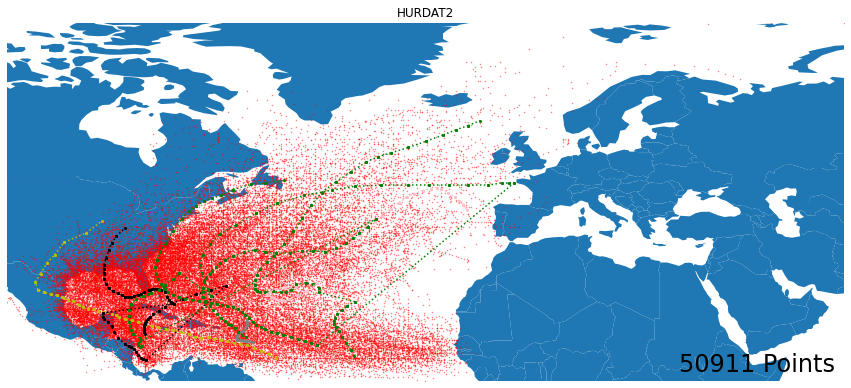

In [4]:
from matplotlib import pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
df = pd.read_csv("data/hur.csv", header=0, delimiter=',',parse_dates=['date_time'])
gdf = gpd.GeoDataFrame(df, geometry=[Point(xy) for xy in zip(df['Longitude'], df['Latitude'])])  
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15, 12))
ax = gdf.plot(ax=ax, marker='.',alpha=0.5, markersize=1, color='red')
ax.set_xlim([df.Longitude.min(),df.Longitude.max()])
ax.set_ylim([df.Latitude.min(),df.Latitude.max()])
ax.text(45,8,str(gdf.shape[0])+' Points',ha='center', va='bottom', rotation=0,color='Black',fontsize=24)
ax.set_axis_off()
plt.title("HURDAT2")



def plot_hurr(name,cc):
    GILBERT=gdf.loc[gdf.Name==name,:]
    for i in range(GILBERT.shape[0]-2):
        plt.plot(GILBERT.iloc[i:i+2,:].geometry.x,GILBERT.iloc[i:i+2,:].geometry.y, 
                 'yo:',marker='.',color=cc, markersize=4,)

plot_hurr("OSCAR",'g')
plot_hurr("GILBERT",'y')
plot_hurr("LOIS",'pink')
plot_hurr("HELENA",'gray')
plot_hurr("KATRINA",'black')
plot_hurr("FLOYD",'g')

plt.savefig('plt.png')

plt.show()

# EDA with Tableau
Tableau is a powerful tool tor EDA. The visualization below maps the trajectory of hurricanes for the given year. The size of dots is directly proportional to the windspeed at that location and color shows the different hurricanes.

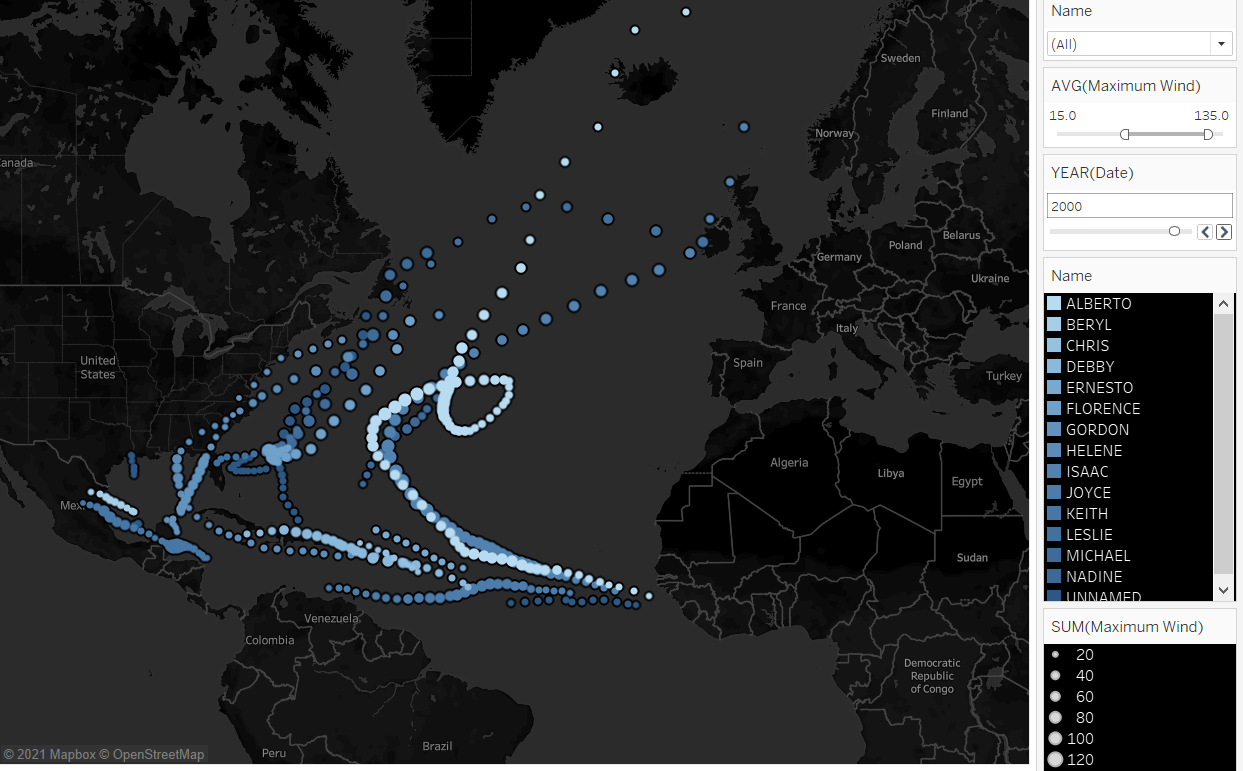

####  Wind Speed and Pressure Correlation graph

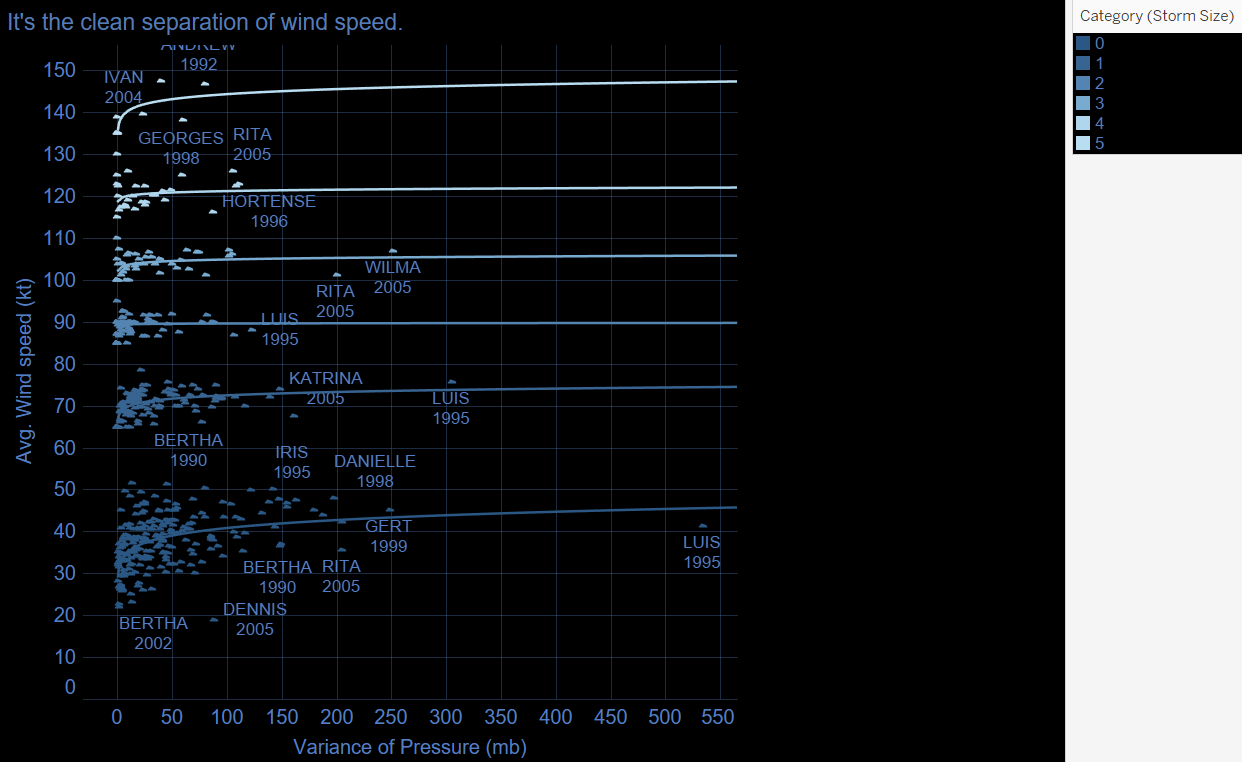

#### Peak Season Graph
The graph shows the distribution of hurricanes per month and it shows that spetember produced the strongest of hurricanes over all years.

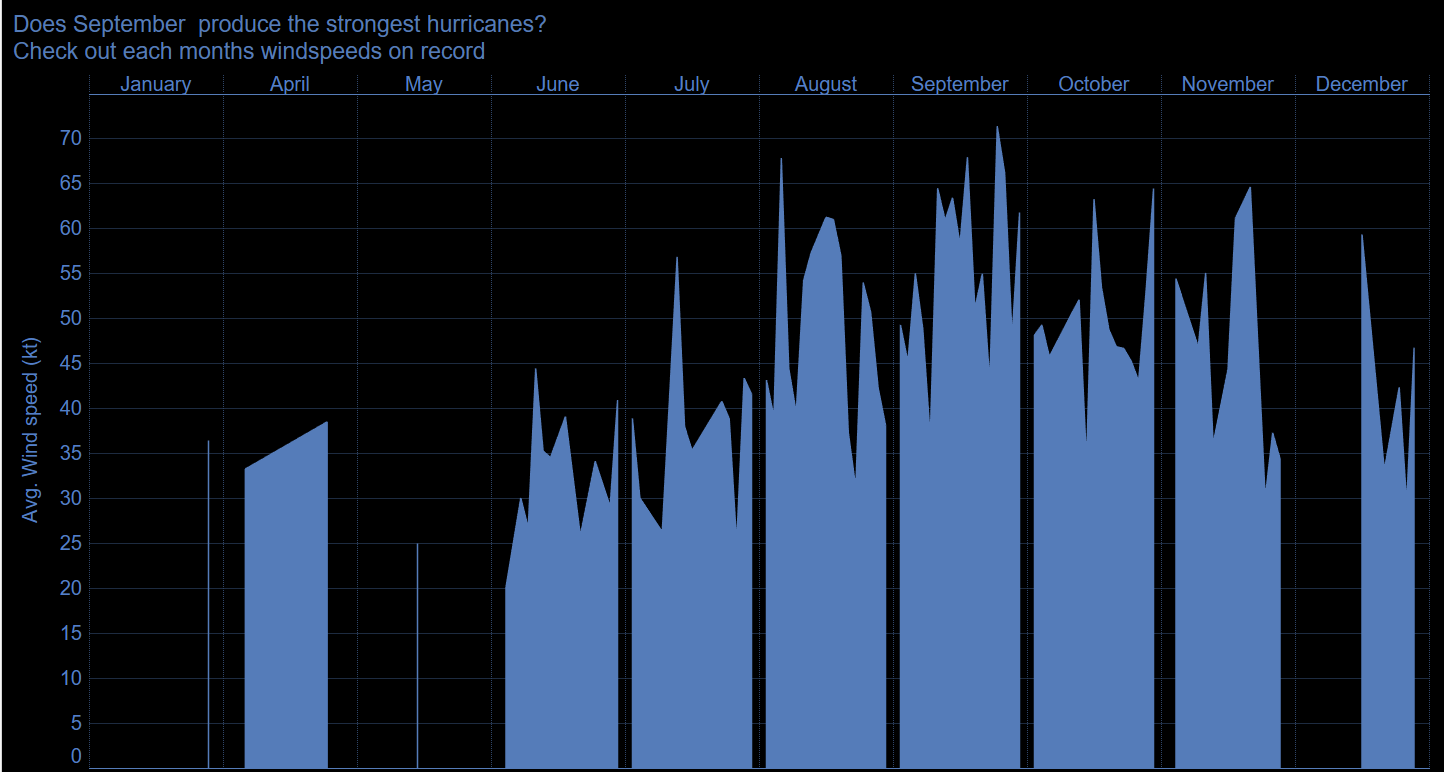